In [2]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


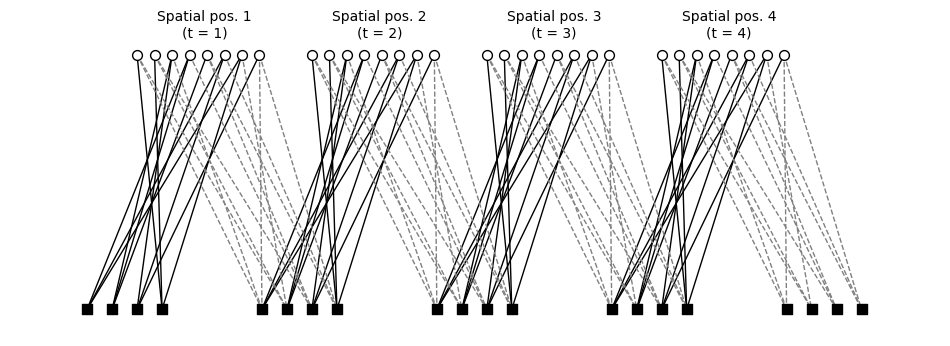

In [112]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_tanner_graph(L=4, V=5, C=3, vertical_spacing=2, horizontal_spacing=4, inter_node_spacing=0.5):
    G = nx.Graph()

    pos = {}
    labels = {}

    # Create nodes and define positions
    for t in range(1, L + 1):
        base_x = t * horizontal_spacing
        # Position variable nodes
        for i in range(V):
            var_node = f'v{t}_{i+1}'
            G.add_node(var_node, node_type='variable')
            pos[var_node] = (base_x + i * (inter_node_spacing+0.2)-1, 0)  # All variable nodes on y=0
            labels[var_node] = var_node

        # Position check nodes
        for j in range(C):
            chk_node = f'c{t}_{j+1}'
            G.add_node(chk_node, node_type='check')
            pos[chk_node] = (base_x + j * (inter_node_spacing+0.5)-3, -vertical_spacing)  # All check nodes on y=-vertical_spacing
            labels[chk_node] = chk_node
    
    # Remove unconnected nodes in the last spatial position
    for i in range(V):
        G.remove_node(f'v{L}_{i+1}')
        
    # Create edges
    for t in range(1, L):
        for i in range(V):
            for j in range(C):
                # Solid edges within the same spatial position
                G.add_edge(f'v{t}_{1}', f'c{t}_{4}', style='solid')
                G.add_edge(f'v{t}_{2}', f'c{t}_{4}', style='solid')
                
                G.add_edge(f'v{t}_{3}', f'c{t}_{2}', style='solid')
                G.add_edge(f'v{t}_{3}', f'c{t}_{3}', style='solid')

                G.add_edge(f'v{t}_{4}', f'c{t}_{1}', style='solid')
                G.add_edge(f'v{t}_{4}', f'c{t}_{2}', style='solid')

                G.add_edge(f'v{t}_{5}', f'c{t}_{2}', style='solid')

                G.add_edge(f'v{t}_{6}', f'c{t}_{1}', style='solid')
                G.add_edge(f'v{t}_{6}', f'c{t}_{3}', style='solid')

                G.add_edge(f'v{t}_{7}', f'c{t}_{1}', style='solid')
                G.add_edge(f'v{t}_{7}', f'c{t}_{4}', style='solid')

                G.add_edge(f'v{t}_{8}', f'c{t}_{3}', style='solid')
            
                # Dashed edges to the next spatial position
                if t < L:
                    G.add_edge(f'v{t}_{1}', f'c{t+1}_{1}', style='dashed')
                    G.add_edge(f'v{t}_{1}', f'c{t+1}_{2}', style='dashed')

                    G.add_edge(f'v{t}_{2}', f'c{t+1}_{2}', style='dashed')
                    G.add_edge(f'v{t}_{2}', f'c{t+1}_{3}', style='dashed')

                    G.add_edge(f'v{t}_{3}', f'c{t+1}_{1}', style='dashed')

                    G.add_edge(f'v{t}_{4}', f'c{t+1}_{3}', style='dashed')

                    G.add_edge(f'v{t}_{5}', f'c{t+1}_{3}', style='dashed')
                    G.add_edge(f'v{t}_{5}', f'c{t+1}_{4}', style='dashed')

                    G.add_edge(f'v{t}_{6}', f'c{t+1}_{4}', style='dashed')

                    G.add_edge(f'v{t}_{7}', f'c{t+1}_{2}', style='dashed')

                    G.add_edge(f'v{t}_{8}', f'c{t+1}_{1}', style='dashed')
                    G.add_edge(f'v{t}_{8}', f'c{t+1}_{4}', style='dashed')


    # Drawing of the graph
    plt.figure(figsize=(12, 4))
    variable_nodes = [n for n, d in G.nodes(data=True) if d['node_type'] == 'variable']
    check_nodes = [n for n, d in G.nodes(data=True) if d['node_type'] == 'check']
    nx.draw_networkx_nodes(G, pos, nodelist=variable_nodes, node_color='white', node_size=50, node_shape='o', edgecolors='black')
    nx.draw_networkx_nodes(G, pos, nodelist=check_nodes, node_color='black', node_size=50, node_shape='s')

    edges = G.edges(data=True)
    solid_edges = [(u, v) for u, v, d in edges if d['style'] == 'solid']
    dashed_edges = [(u, v) for u, v, d in edges if d['style'] == 'dashed']
    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color='black', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, edge_color='gray', style='dashed')

    for t in range(1, L):
        plt.text(1.7+t * horizontal_spacing, 0.2, f'Spatial pos. {t}', horizontalalignment='center')
        plt.text(1.7+t * horizontal_spacing, 0.1, f'(t = {t})', horizontalalignment='center')

    #plt.title('Spatially Coupled Tanner Graph')
    plt.axis('off')
    plt.show()

# Parameters to control layout
L = 5  # Number of spatial positions (+1)
V = 8  # Number of variable nodes per position
C = 4  # Number of check nodes per position
vertical_spacing = 1.5
horizontal_spacing = 7
inter_node_spacing = 0.5

draw_tanner_graph(L, V, C, vertical_spacing, horizontal_spacing, inter_node_spacing)


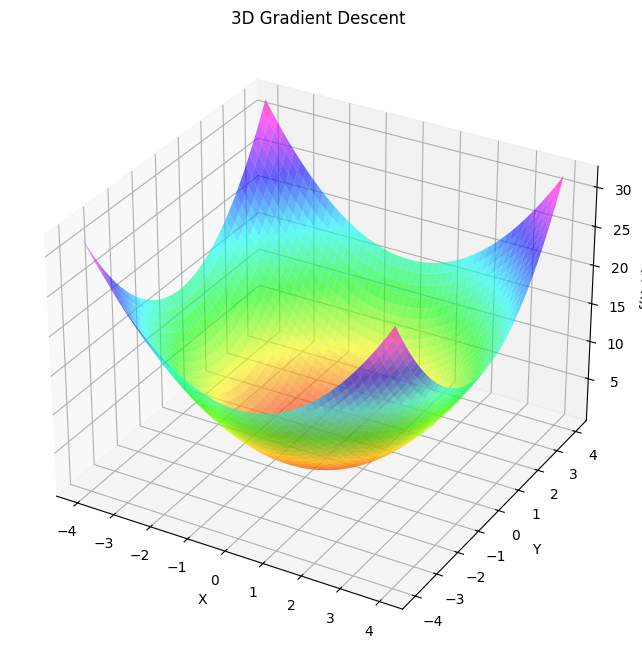

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to minimize and its gradient
def f(x, y):
    return x**2 + y**2

def gradient(x, y):
    return np.array([2*x, 2*y])

# Gradient descent parameters
learning_rate = 0.1
num_iterations = 20
initial_point = np.array([3.0, 3.0])

# Perform gradient descent
points = [initial_point]
current_point = initial_point
for _ in range(num_iterations):
    grad = gradient(current_point[0], current_point[1])
    next_point = current_point - learning_rate * grad
    points.append(next_point)
    current_point = next_point

# Convert points list to a NumPy array
points = np.array(points)

# Create a meshgrid for plotting the function
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a custom color map
surface_color_map = 'gist_rainbow'
ax.plot_surface(X, Y, Z, alpha=0.6, cmap=surface_color_map)

# Plot the gradient descent path with a custom color
path_color = 'blue'
#ax.plot(points[:, 0], points[:, 1], f(points[:, 0], points[:, 1]), color=path_color, marker='o')

# Annotate the points
#for i in range(len(points)):
   # ax.text(points[i, 0], points[i, 1], f(points[i, 0], points[i, 1]), f'{i}', color='black')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Gradient Descent')

plt.show()
